In [380]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [384]:
# df = pd.read_csv('https://raw.githubusercontent.com/mahlswede/Exercises/master/people.csv')
# we replaced <30 with 28, 31..40 with 36, >40 with 42, 
#df = pd.read_csv('people2.csv') 
df = pd.read_csv('https://raw.githubusercontent.com/mahlswede/Exercises/master/people2.csv')
df

,REC,Age,Income,Student,Credit_rating,Buys_computer
0,r1,28,High,No,Fair,No
1,r2,28,High,No,Excellent,No
2,r3,36,High,No,Fair,Yes
3,r4,42,Medium,No,Fair,Yes
4,r5,42,Low,Yes,Fair,Yes
5,r6,42,Low,Yes,Excellent,No
6,r7,36,Low,Yes,Excellent,Yes
7,r8,28,Medium,No,Fair,No
8,r9,28,Low,Yes,Fair,Yes
9,r10,42,Medium,Yes,Fair,Yes


In [385]:
df.columns

Index(['REC', 'Age', 'Income', 'Student', 'Credit_rating', 'Buys_computer'], dtype='object')

In [386]:
# Entropy
import math

def entropy(x,y):
    if x == 0 or y == 0:
        return 0
    else:
        r = -x/(x+y)*math.log2(x/(x+y))-y/(x+y)*math.log2(y/(x+y))
        return r

In [387]:
#test the function entropy
entropy(12,8)

0.9709505944546686

In [388]:
# replace the strings
df['Student'].replace('Yes', 1, inplace=True)
df['Student'].replace('No', 0, inplace=True)

In [389]:
df['Income'].replace('High', 5000, inplace=True)
df['Income'].replace('Medium', 3000, inplace=True)
df['Income'].replace('Low', 2000, inplace=True)

In [390]:
df['Credit_rating'].replace('Excellent', 2, inplace=True)
df['Credit_rating'].replace('Fair', 1, inplace=True)

In [391]:
# replace the strings
# these strings must not replaced, otherwise error graphviz/classnames "must be string not int64" 
#df['Buys_computer'].replace('Yes', 1, inplace=True)
#df['Buys_computer'].replace('No', 0, inplace=True)

In [392]:
df.drop(['REC'], axis=1, inplace=True)

In [393]:
# let's see the dateframe now
df.values

array([[28, 5000, 0, 1, 'No'],
       [28, 5000, 0, 2, 'No'],
       [36, 5000, 0, 1, 'Yes'],
       [42, 3000, 0, 1, 'Yes'],
       [42, 2000, 1, 1, 'Yes'],
       [42, 2000, 1, 2, 'No'],
       [36, 2000, 1, 2, 'Yes'],
       [28, 3000, 0, 1, 'No'],
       [28, 2000, 1, 1, 'Yes'],
       [42, 3000, 1, 1, 'Yes'],
       [28, 3000, 1, 2, 'Yes'],
       [36, 3000, 0, 2, 'Yes'],
       [36, 5000, 1, 1, 'Yes'],
       [42, 3000, 0, 2, 'No'],
       [28, 3000, 0, 2, 'No'],
       [28, 2000, 0, 1, 'No'],
       [28, 2000, 0, 2, 'No'],
       [36, 2000, 1, 1, 'Yes'],
       [42, 3000, 1, 2, 'Yes'],
       [36, 5000, 0, 2, 'Yes']], dtype=object)

In [394]:
# due to df.drop('REC') index changed
#X = df.values[:, 1:4]
X = df.values[:, 0:4]
# due to df.drop('REC') index changed
#y = df.values[:,5]
y = df.values[:,4]
X

array([[28, 5000, 0, 1],
       [28, 5000, 0, 2],
       [36, 5000, 0, 1],
       [42, 3000, 0, 1],
       [42, 2000, 1, 1],
       [42, 2000, 1, 2],
       [36, 2000, 1, 2],
       [28, 3000, 0, 1],
       [28, 2000, 1, 1],
       [42, 3000, 1, 1],
       [28, 3000, 1, 2],
       [36, 3000, 0, 2],
       [36, 5000, 1, 1],
       [42, 3000, 0, 2],
       [28, 3000, 0, 2],
       [28, 2000, 0, 1],
       [28, 2000, 0, 2],
       [36, 2000, 1, 1],
       [42, 3000, 1, 2],
       [36, 5000, 0, 2]], dtype=object)

In [395]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes'],
      dtype=object)

In [396]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [398]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="buycomputer.dot",
        #feature_names=df.values[:, 1:4],
        feature_names = ['Age','Income','Student','Credit_rating'],
        class_names=df.values[:,4],
        rounded=True,
        filled=True
)

In [399]:
# in cmd enter:
# .\graphviz\release\bin\dot.exe -Tpng buycomputer.dot -o buycomputer.png

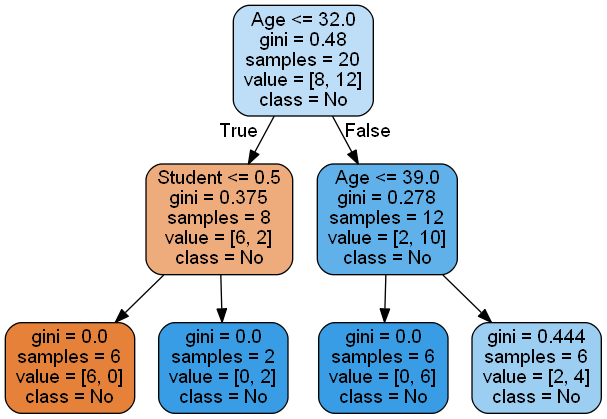

In [400]:
from IPython.display import Image
Image("buycomputer.png", width=320, height=320)

In [ ]:
# argghgh, a lot of scrap
# giving up here :((